# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

In [1]:
#Importo tutte le librerie necessarie

import numpy as np # Libreria per la manipolazione di array e calcoli matematici
import pandas as pd # Libreria per la manipolazione e l'analisi di dati
import matplotlib.pyplot as plt  # Libreria per la creazione di grafici

In [2]:
#Figure più leggibili

# Imposto le dimensioni del titolo dell'asse
plt.rcParams['axes.titlesize'] = 16

# Imposto le dimensioni delle etichette dell'asse
plt.rcParams['axes.labelsize'] = 14

# Imposto le dimensioni della legenda
plt.rcParams['legend.fontsize'] = 12

# Imposto le dimensioni dei tick sull'asse x
plt.rcParams['xtick.labelsize'] = 12

# Imposto le dimensioni dei tick sull'asse y
plt.rcParams['ytick.labelsize'] = 12

# Disabilito le linee del bordo destro degli assi
plt.rcParams['axes.spines.right'] = False

# Disabilito le linee del bordo superiore degli assi
plt.rcParams['axes.spines.top'] = False

# Imposto la griglia
plt.rcParams['axes.grid'] = True

## CIRCONFERENZA

In [3]:
pos_circ = pd.read_csv("OUTPUT/pos.out", sep = "\s+", index_col = False, header = 0, names = ["label", "x", "y"])
loss_circ = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])
ave_circ = pd.read_csv("OUTPUT/ave_loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "ave"])

/tmp/ipykernel_294990/2444972165.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  loss_circ = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])


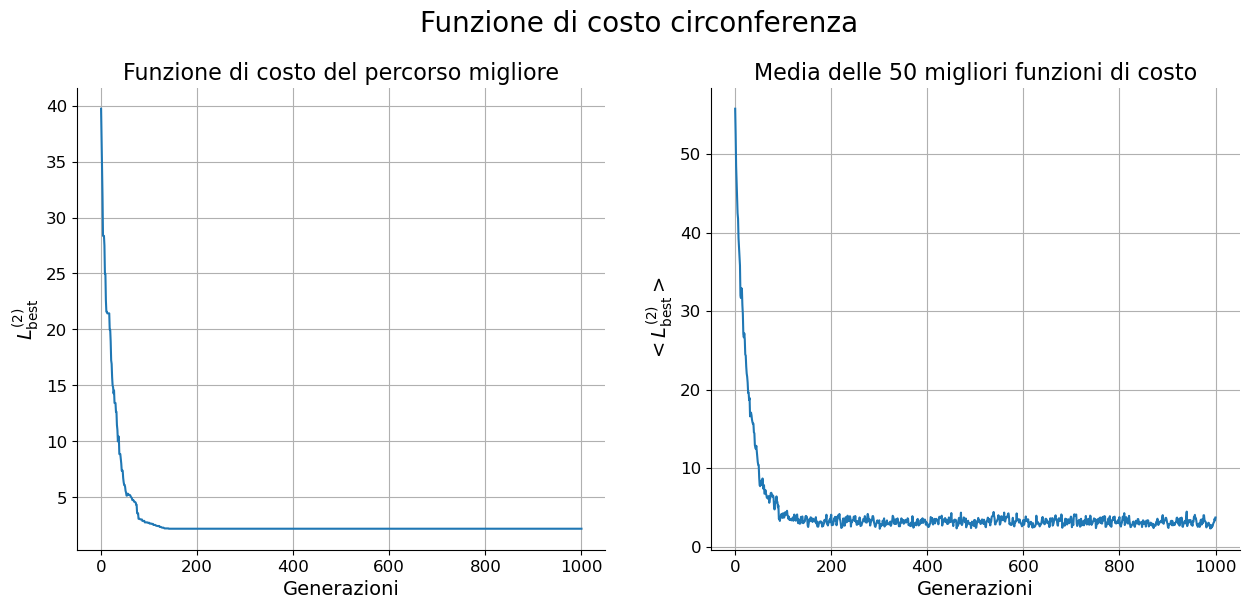

In [4]:
# Creazione di una figura con due subplot
fig, axx = plt.subplots(1, 2, figsize=(15, 6))

# Plot
axx[0].plot(np.array(loss_circ.gen), np.array(loss_circ.loss))
axx[1].plot(np.array(ave_circ.gen), np.array(ave_circ.ave))

# Impostazione del titolo
axx[0].set_title("Funzione di costo del percorso migliore")
axx[1].set_title("Media delle 50 migliori funzioni di costo")

# Etichette per gli assi
axx[0].set_xlabel("Generazioni")
axx[0].set_ylabel(r"$L^{(2)}_\mathrm{best}$")

axx[1].set_xlabel("Generazioni")
axx[1].set_ylabel(r"$<L^{(2)}_\mathrm{best}>$")

# Titolo della figura
fig.suptitle("Funzione di costo circonferenza", size=20, y=1.01)

# Visualizzazione
plt.show()

## QUADRATO

In [15]:
# Importo i dati
pos_quad = pd.read_csv("OUTPUT/pos.out", sep = "\s+", index_col = False, header = 0, names = ["label", "x", "y"])
loss_quad = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])
ave_quad = pd.read_csv("OUTPUT/ave_loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "ave"])

/tmp/ipykernel_294990/3936563380.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  loss_quad = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])


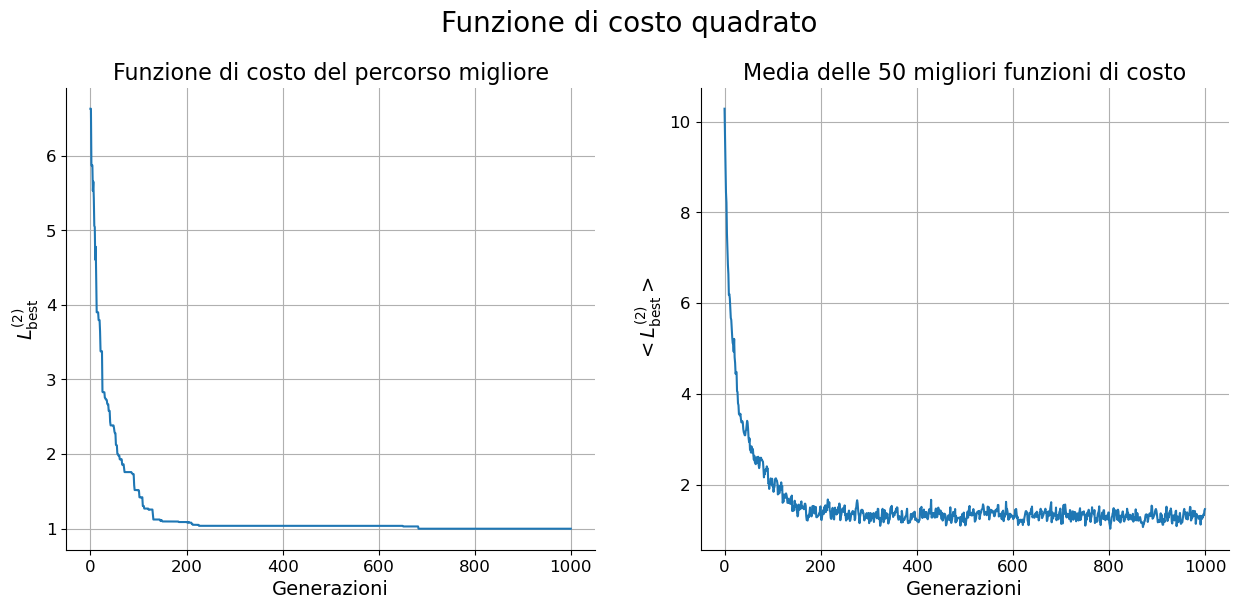

In [16]:
# Creazione di una figura con due subplot
fig, axx = plt.subplots(1, 2, figsize=(15, 6))

# Plot
axx[0].plot(np.array(loss_quad.gen), np.array(loss_quad.loss))
axx[1].plot(np.array(ave_quad.gen), np.array(ave_quad.ave))

# Impostazione del titolo
axx[0].set_title("Funzione di costo del percorso migliore")
axx[1].set_title("Media delle 50 migliori funzioni di costo")

# Etichette per gli assi
axx[0].set_xlabel("Generazioni")
axx[0].set_ylabel(r"$L^{(2)}_\mathrm{best}$")

axx[1].set_xlabel("Generazioni")
axx[1].set_ylabel(r"$<L^{(2)}_\mathrm{best}>$")

# Titolo della figura
fig.suptitle("Funzione di costo quadrato", size=20, y=1.01)

# Visualizzazione
plt.show()

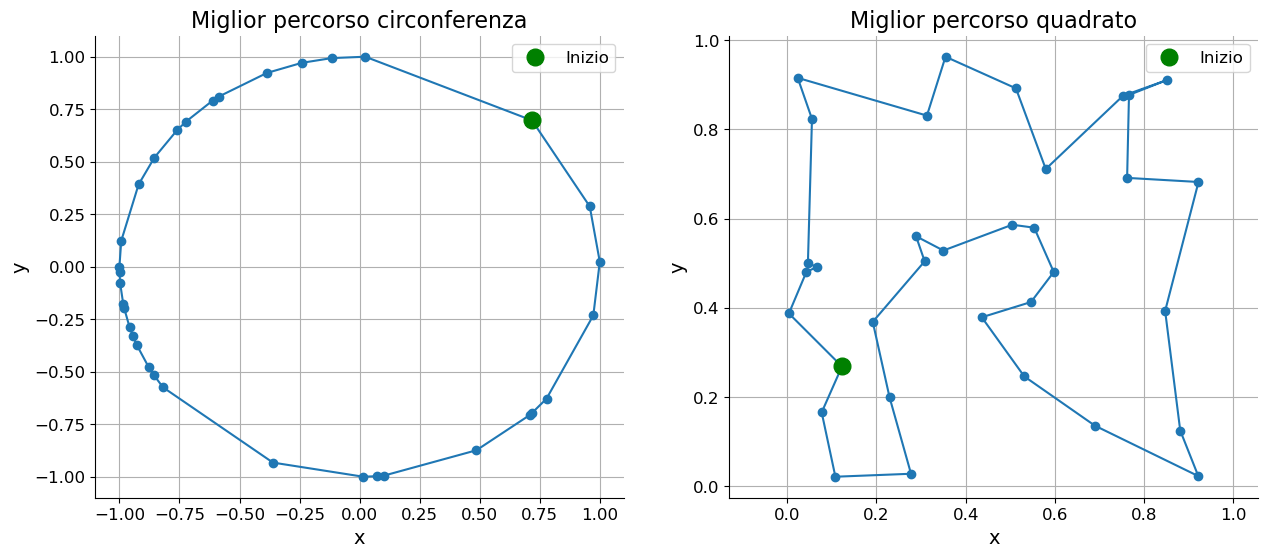

In [17]:
# Creazione di una figura con due subplot
fig, axx = plt.subplots(1, 2, figsize=(15, 6))

# Plot
axx[0].plot(np.array(loss_quad.gen), np.array(loss_quad.loss))
axx[1].plot(np.array(ave_quad.gen), np.array(ave_quad.ave))

# Impostazione del titolo
axx[0].set_title("Funzione di costo del percorso migliore")
axx[1].set_title("Media delle 50 migliori funzioni di costo")

# Etichette per gli assi
axx[0].set_xlabel("Generazioni")
axx[0].set_ylabel(r"$L^{(2)}_\mathrm{best}$")

axx[1].set_xlabel("Generazioni")
axx[1].set_ylabel(r"$<L^{(2)}_\mathrm{best}>$")

# Titolo della figura
fig.suptitle("Funzione di costo quadrato", size=20, y=1.01)

# Visualizzazione
plt.show()

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

In [41]:
# Importo i dati
pos_cap = pd.read_csv("OUTPUT/pos.out", sep = "\s+", index_col = False, header = 0, names = ["label", "x", "y"])
loss_cap = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])
ave_cap = pd.read_csv("OUTPUT/ave_loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "ave"])

/tmp/ipykernel_294990/2823070173.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  loss_cap = pd.read_csv("OUTPUT/loss.out", sep = "\s+", index_col = False, header = 0, names = ["gen", "loss"])


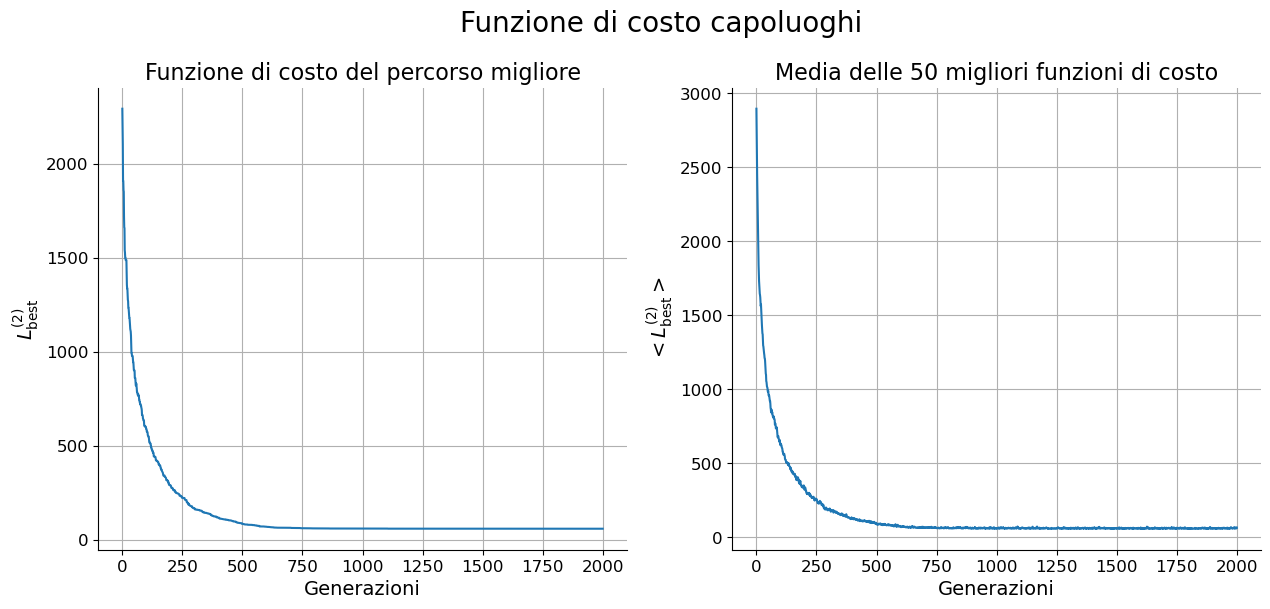

In [42]:
# Creazione di una figura con due subplot
fig, axx = plt.subplots(1, 2, figsize=(15, 6))

# Plot
axx[0].plot(np.array(loss_cap.gen), np.array(loss_cap.loss))
axx[1].plot(np.array(ave_cap.gen), np.array(ave_cap.ave))

# Impostazione del titolo
axx[0].set_title("Funzione di costo del percorso migliore")
axx[1].set_title("Media delle 50 migliori funzioni di costo")

# Etichette per gli assi
axx[0].set_xlabel("Generazioni")
axx[0].set_ylabel(r"$L^{(2)}_\mathrm{best}$")

axx[1].set_xlabel("Generazioni")
axx[1].set_ylabel(r"$<L^{(2)}_\mathrm{best}>$")

# Titolo della figura
fig.suptitle("Funzione di costo capoluoghi", size=20, y=1.01)

# Visualizzazione
plt.show()

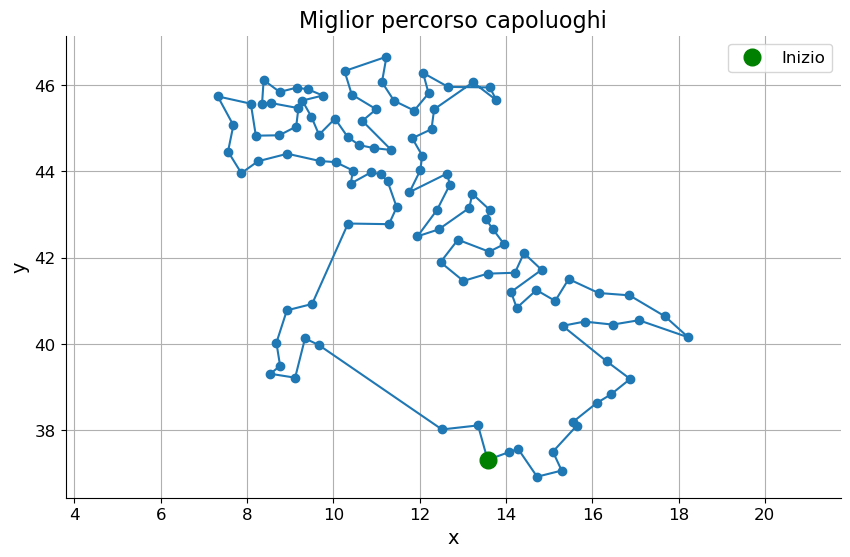

In [43]:
# Crea una nuova figura
plt.figure(figsize=(10, 6))

# Imposta gli assi in modo che abbiano la stessa scala
plt.axis("equal")

# Plot
plt.plot(np.array(pos_cap.x), np.array(pos_cap.y), marker="o", linestyle="-")

# Evidenzia il primo punto del percorso come punto di inizio
plt.plot(pos_cap.x[0], pos_cap.y[0], "go", ms=12, label="Inizio")

# Aggiunge una legenda al grafico
plt.legend()

# Imposta il titolo del grafico
plt.title("Miglior percorso capoluoghi")

# Imposta l'etichette per gli assi
plt.xlabel("x")
plt.ylabel("y")

# Mostra il grafico
plt.show()